## SSE(Sum of Squares for error)

In [1]:
def sum_squares_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
import numpy as np

In [3]:
t= np.array([0,0,1,0,0,0,0,0,0,0])

y= np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0])
sum_squares_error(y,t)

0.09750000000000003

In [4]:
y = np.array([0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0])
sum_squares_error(y,t)

0.5975

## CEE(Cross Entropy error)

In [5]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [6]:
t= np.array([0,0,1,0,0,0,0,0,0,0])
y= np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0])

cross_entropy_error(y,t)

0.510825457099338

In [7]:
y = np.array([0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0])
cross_entropy_error(y,t)

2.302584092994546

## Mini batch learning

In [8]:
import sys,os
sys.path.append(os.curdir)
from dataset.mnist import load_mnist

In [9]:
(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
train_size = x_train.shape[0]
batch_size=10
batch_mask = np.random.choice(train_size,batch_size)
print(batch_mask)
print(type(batch_mask))

[49965 33640 13498  3720 53034 51989  5209 30509 18687 57430]
<class 'numpy.ndarray'>


In [11]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [12]:
# y are represented to One-hot encoding
def cross_entropy_error(y,t):
    if y.ndim ==1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y + 1e-7))/batch_size

In [13]:
# y aren't represented to One-hot encoding
def cross_entropy_error(y,t):
    if y.ndim ==1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum( np.log(y[np.arange(batch_size),t] + 1e-7)) / batch_size

## Numerical Differentiation

In [14]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

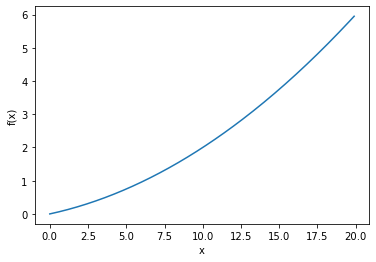

In [15]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

import matplotlib.pylab as plt

x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [16]:
print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

0.1999999999990898
0.2999999999986347


## Partial Derivative(편미분)

In [17]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [18]:
# x1=4일때 x0의 편미분식
def function_tmp1(x0):
    return x0*x0 + 4**2
# x0=3일때 x1의 편미분식
def function_tmp2(x1):
    return x1*x1 + 3**2

print(numerical_diff(function_tmp1,3.0))
print(numerical_diff(function_tmp2,4.0))

6.00000000000378
7.999999999999119


## Gradient Descent

In [19]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)계산
        x[idx]= tmp_val+h
        fxh1 = f(x)
        
        # f(x-h)계산
        x[idx] = tmp_val-h
        fxh2 = f(x)
        
        grad[idx]= (fxh1-fxh2)/(2*h)
        x[idx]=tmp_val
    return grad

In [20]:
print(numerical_gradient(function_2,np.array([3.0,4.0])))
print(numerical_gradient(function_2,np.array([0.0,2.0])))
print(numerical_gradient(function_2,np.array([3.0,0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [30]:
def numerical_gradient(f,x):
    h = 1e-4
    x_size = np.shape(x)
    x = x.flatten()
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx];
        x[idx] = tmp_val-h
        fxh1 = f(x)
        x[idx] = tmp_val+h
        fxh2 = f(x)
        
        grad[idx] = (fxh2-fxh1)/(2*h)
        x[idx] =tmp_val
    
    return np.reshape(grad,x_size)


print(numerical_gradient(function_2,np.array( [[1.0,2.0],[3.0,4.0]]    )))
print(numerical_gradient(function_2,np.array([0.0,2.0])))
print(numerical_gradient(function_2,np.array([3.0,0.0])))

[[2. 4.]
 [0. 0.]]
[0. 4.]
[6. 0.]


In [34]:
size = np.shape(np.array( [[1.0,2.0],[3.0,4.0]]))
np.reshape(np.array( [[1.0,2.0],[3.0,4.0]]).flatten(),size)

array([[1., 2.],
       [3., 4.]])

In [22]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    for i in range(step_num):
        grad= numerical_gradient(f,x)
        x -= lr*grad
    return x

In [23]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [24]:
import sys,os
sys.path.append(os.curdir)
from common.functions import softmax,cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [25]:
net = simpleNet()
print(net.W,end='\n\n')
x = np.array([0.6,0.9])
p = net.predict(x)
print(p,end='\n\n')
np.argmax(p)

t = np.array([0,0,1])
print(net.loss(x,t))

[[ 0.67228858  0.07288793 -1.56799641]
 [ 0.35484023 -0.116503   -2.56474645]]

[ 0.72272936 -0.06111995 -3.24906965]

4.360777501208189


In [26]:
def f(W):
    return net.loss(x,t)

f = lambda w:net.loss(x,t)

dW = numerical_gradient(f,net.W)
print(dW)

[[ 0.40664294  0.18569141 -0.59233435]
 [ 0.60996441  0.27853711 -0.88850152]]


## total implementation

In [27]:
import sys,os
sys.path.append(os.curdir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,
                weight_init_std=0.01):
        # 가중치 초기화
        self.params={}
        self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
        
        return
    
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.params['b1'],self.params['b2']
        
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        
        a2 = np.dot(z1,W2)+b2
        y = softmax(a2)
        
        return y
    def loss(self,x,t):
        y = self.predict(x)
        
        return cross_entropy_error(y,t)
        
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        
        accuracy= np.sum(y==t)/ float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self,x,t):
        loss_W = lambda W: self.loss(x,t)
            
        grads={}
        grads['W1'] = numerical_gradient(loss_W,self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W,self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W,self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W,self.params['b2'])
        
        return grads
            
        
        

In [28]:
from dataset.mnist import load_mnist
from common.two_layer_net import TwoLayerNet
(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

train_loss_list=[]

#하이퍼파라미터
iters_num=100
train_size= x_train.shape[0]
batch_size=10
learning_rate=0.1

network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

for i in range(iters_num):
    batch_mask= np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # gradient calculation
    grad =network.numerical_gradient(x_batch,t_batch)
    
    # gradient update
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # learning check
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

KeyboardInterrupt: 

In [ ]:
plt.plot( np.arange(iters_num ),train_loss_list)

In [ ]:
train_loss_list